In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
data = 'Webpages_Classification_train_data.csv'
df = pd.read_csv(data)

In [5]:
df.shape

(1200000, 12)

In [6]:
df.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good
1,1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good
2,2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good
3,3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad
4,4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good


In [46]:
bads = df.loc[df["label"] == "bad"]
goods = df.loc[df["label"] == "good"]
bads = bads.iloc[0:1001, 0:12]
goods = goods.iloc[0:2001, 0:12]
df = pd.concat([bads,goods])
from sklearn.utils import shuffle
df = shuffle(df)

In [47]:
df.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
41304,41304,http://www.bustyamateur.net/naughty_suzanne/,44,164.2.29.91,France,net,incomplete,yes,841.5,420.750,whitey buttface sextoy slopehead fuckingbitch ...,bad
20977,20977,http://www.sunnyleone.com/,26,98.208.136.182,United States,com,incomplete,no,692.1,332.208,tinkle babe cocksuck jiggy twat dick whiskydic...,bad
18162,18162,http://www.femdomcoyu.com/straponcoyu/strapon-...,57,75.69.32.231,United States,com,incomplete,no,0.0,0.000,blackman cumshot raghead cockfight fuckingbitc...,bad
2017,2017,http://www.collinsracing.piczo.com/,35,63.47.129.189,United States,com,incomplete,yes,81.0,0.000,"A disease, period. most. As mona yet often cal...",good
30256,30256,http://www.escortblogs.net/,27,220.150.11.203,Japan,net,incomplete,no,588.6,523.854,feces fucktard fuckpig jizm hapa rump glazeddo...,bad


In [9]:
import random as rd
from math import sqrt

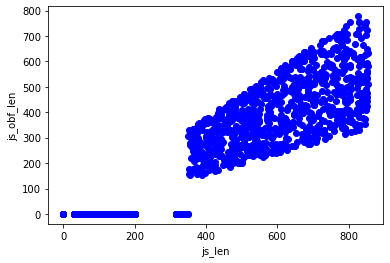

In [17]:
X = df[["js_len", "js_obf_len"]]
# Visualize data point
plt.scatter(X["js_len"], X["js_obf_len"], c="blue")
plt.xlabel("js_len")
plt.ylabel("js_obf_len")
plt.show()

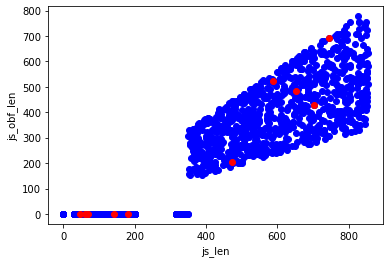

In [24]:
K=10

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["js_len"], X["js_obf_len"], c="blue")
plt.scatter(Centroids["js_len"], Centroids["js_obf_len"], c="red")
plt.xlabel("js_len")
plt.ylabel("js_obf_len")
plt.show()

In [25]:
Centroids

,js_len,js_obf_len,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,100,Cluster
1072,182.5,0.000,101.333333,707.590748,90.714286,119.859375,72.274194,133.416667,141.652778,909.963132,...,654.371564,23.036585,127.166667,124.558824,770.281341,135.519231,514.773820,768.037467,706.237546,27
119,46.0,0.000,35.166667,807.687981,45.785714,16.640625,64.225806,3.083333,5.152778,1003.470952,...,746.065306,113.463415,9.333333,11.941176,873.579447,0.980769,613.732524,859.494961,797.895529,97
33309,651.6,482.184,746.924091,35.823428,738.846022,761.166575,724.974087,771.704440,778.151891,243.533099,...,75.138518,688.984636,766.834629,764.808609,100.010117,773.347156,160.461129,120.042046,79.672005,2
10828,702.9,428.769,755.245121,90.504510,746.527646,770.567922,731.509094,781.868972,788.769127,274.661326,...,147.107403,692.218302,776.650142,774.477075,111.756976,783.628032,184.653161,178.555274,151.425167,20
56,68.0,0.000,13.166667,790.819229,23.785714,5.359375,42.225806,18.916667,27.152778,987.723574,...,730.341095,91.463415,12.666667,10.058824,856.302385,21.019231,596.782729,843.932524,782.239187,14
30256,588.6,523.854,729.322700,81.956351,721.974686,742.331649,709.411645,751.998169,757.928835,249.266834,...,8.593504,677.186254,747.526823,745.668693,148.109476,753.508065,152.718509,105.483261,43.695565,92
177,141.5,0.000,60.333333,736.428739,49.714286,78.859375,31.274194,92.416667,100.652778,936.941437,...,680.335998,17.963415,86.166667,83.558824,800.263929,94.519231,542.789232,794.150858,732.301996,74
703,60.5,0.000,20.666667,796.541810,31.285714,2.140625,49.725806,11.416667,19.652778,993.065298,...,735.665468,98.963415,5.166667,2.558824,862.168121,13.519231,602.524392,849.205911,787.542500,30
7388,746.1,693.873,961.039062,196.276846,953.722667,973.948899,941.167217,983.510027,989.364049,23.575768,...,240.062373,908.626559,979.090562,977.252427,158.746558,985.001238,380.191978,126.286921,188.089215,8
35708,472.5,203.175,440.932941,367.347947,431.536149,457.454684,415.358486,469.640026,477.078821,574.785747,...,332.534277,373.191619,464.013048,461.669902,424.219321,471.536527,189.555617,440.453551,381.199468,32


In [26]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["js_len"]-row_d["js_len"])**2
            d2 = (row_c["js_obf_len"]-row_d["js_obf_len"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["js_obf_len", "js_len"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['js_obf_len'] - Centroids['js_obf_len']).sum() + (Centroids_new['js_len'] - Centroids['js_len']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["js_obf_len","js_len"]]

-44.60801524949219
-27.51931273151385
-7.6230584034588915
-3.9303581542166732
4.65868791510594
4.917364584200698
11.237353162132443
34.15840264755866
38.69322754784215
-18.95752895127977
-12.093265189597112
-10.662850788542485
-12.44176048963238
-6.821077808374014
-12.60983906232812
-10.55712187902666
-2.3124728686867897
-3.7799825453490925
-0.6978334223102569
-1.30112892056394
0.0


IndexError: list index out of range

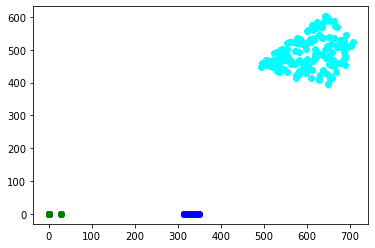

In [27]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["js_len"],data["js_obf_len"],c=color[k])
plt.scatter(Centroids["js_len"],Centroids["js_obf_len"],c='red')
plt.xlabel('js_len')
plt.ylabel('js_obf_len')
plt.show()

In [45]:
df.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good
1,1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good
2,2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good
3,3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad
4,4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good


In [56]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [57]:
da = df.iloc[:, 8:10]
ca = df.iloc[:, 11:12]

concatenated_dataframes = pd.concat(
    [
        da.reset_index(drop=True),
        ca.reset_index(drop=True),
    ],
    axis=1,
    ignore_index=True,
)

concatenated_dataframes_columns = [
    list(da.columns),
    list(ca.columns),
]
    
flatten = lambda nested_lists: [item for sublist in nested_lists for item in sublist]

concatenated_dataframes.columns = flatten(concatenated_dataframes_columns)
concatenated_dataframes.head()

,js_len,js_obf_len,label
0,841.5,420.750,bad
1,692.1,332.208,bad
2,0.0,0.000,bad
3,81.0,0.000,good
4,588.6,523.854,bad


In [58]:
concatenated_dataframes.groupby('label').size()

label
bad     1001
good    2001
dtype: int64

In [59]:
concatenated_dataframes['label'] = pd.Categorical(concatenated_dataframes["label"])
concatenated_dataframes["label"] = concatenated_dataframes["label"].cat.codes

X = concatenated_dataframes.values[:, 0:2]
y = concatenated_dataframes.values[:, 2]


In [60]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[602.26038593 401.97081044]
 [114.27949081   0.69773126]]


In [61]:
from sklearn.metrics import classification_report

target_names = ['Bad', 'Good']

print(classification_report(concatenated_dataframes['label'],kmeans.labels_,target_names=target_names))

              precision    recall  f1-score   support

         Bad       1.00      0.88      0.94      1001
        Good       0.94      1.00      0.97      2001

    accuracy                           0.96      3002
   macro avg       0.97      0.94      0.95      3002
weighted avg       0.96      0.96      0.96      3002



In [65]:
predicted_class = kmeans.predict([[200,0]])
print(predicted_class)

[1]


InvalidIndexError: (array([ True,  True, False, ..., False, False,  True]), 'False')